In [1079]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

from datetime import datetime
import time
from os import listdir
from os.path import isfile, join
import re

plt.rcParams.update(plt.rcParamsDefault)

# Non-Pharmaceutical Interventions in Canada

Here we show comparisons of descriptive statistics for each regional and subregional-level dataset across Canada. Download individual region CSVs from the Google Sheet and place them in `./data/`. 

Stats Canada data on population size by province available from: 

Statistics Canada. Table 17-10-0009-01 Population estimates, quarterly"
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901
DOI: https://doi.org/10.25318/1710000901-eng


In [1153]:
stats_columns=[
    'file',
    'region',
    'subregion', 
    'rows',
    'columns',
    'start_date.min', 
    'start_date.max', 
    'end_date.min', 
    'end_date.max', 
    'end_date.count / count', 
    'reviewer.unique', 
    'intervention_summary.unique', 
    'intervention_category.unique',
    'target_population_category.unique',
    'target_population_category (% not "General")',
    'enforcement_category.unique',
    'oxford_government_response_category.notna',
    'oxford_government_response_category.unique',
    'oxford_fiscal_measure_cad.sum',
    'source_url.unique'
]

columns=[
    'start_date',
    'end_date',
    'reviewer',
    'country',
    'region',
    'subregion',
    'intervention_summary',
    'intervention_category',
    'target_population_category',
    'enforcement_category',
    'oxford_government_response_category',
    'oxford_closure_code',
    'oxford_public_info_code',
    'oxford_travel_code',
    'oxford_geographic_target_code',
    'oxford_fiscal_measure_cad',
    'oxford_monetary_measure',
    'oxford_testing_code',
    'oxford_tracing_code',
    'source_url',
    'source_organization',
    'source_organization_2',
    'source_category',
    'source_title',
    'source_full_text',
    'note'
]

In [1154]:
population_df = pd.read_csv('statscan-population-q.csv', thousands=',')
population_df[['Geography', 'Q1 2020']]
population_df['region'] = population_df['Geography']
population_df['population_q1_2020'] = pd.to_numeric(population_df['Q1 2020'])
population_df = population_df[['region', 'population_q1_2020']]
population_df

,region,population_q1_2020
0,Canada,37894799
1,Newfoundland and Labrador,521365
2,Prince Edward Island,158158
3,Nova Scotia,977457
4,New Brunswick,779993
5,Quebec,8537674
6,Ontario,14711827
7,Manitoba,1377517
8,Saskatchewan,1181666
9,Alberta,4413146


In [1165]:
full_df = pd.read_csv('Collecting NPIs Effects - FULL.csv')
full_df['start_date'] = pd.to_datetime(full_df['start_date'], format='%m/%d/%Y')
full_df['end_date'] = pd.to_datetime(full_df['end_date'], format='%m/%d/%Y')
full_df['oxford_fiscal_measure_cad'] = full_df['oxford_fiscal_measure_cad'].replace('[\$,]', '', regex=True).astype(float)

provinces_df = full_df[full_df['subregion'].isna() & full_df['region'].notna() & (full_df['region'] != "All")]

federal_df = full_df[full_df['subregion'].isna() & (full_df['region'].isna() | (full_df['region'] == "All"))]

In [1166]:
full_df.shape

(1838, 26)

In [1167]:
provinces_df.shape

(915, 26)

In [1168]:
federal_df.shape

(39, 26)

In [1022]:
full_df.drop(columns=['reviewer']).to_csv('npi_full.csv')
provinces_df.drop(columns=['reviewer']).to_csv('npi_by_province.csv')
federal_df.drop(columns=['reviewer']).to_csv('npi_federal.csv')

## NPI: Enforcement Categories


In [1023]:
len(full_df['enforcement_category'].unique())

6

In [1024]:
full_df.groupby(by='enforcement_category').count().max(axis=1).sort_values()

enforcement_category
Arrest                 6
Legal Action          30
Fines                 39
Refusal of Entry     144
Not Applicable      1445
dtype: int64

Text(0.5,0,'count')

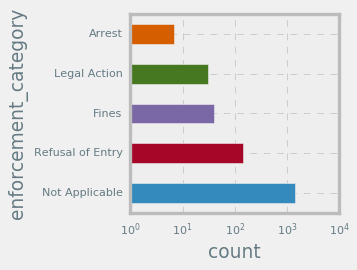

In [1026]:
full_df.groupby(by="enforcement_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(3,3))
plt.xlabel('count')

## Target Population Categories

In [1027]:
len(full_df['target_population_category'].unique())

17

Text(0.5,0,'count')

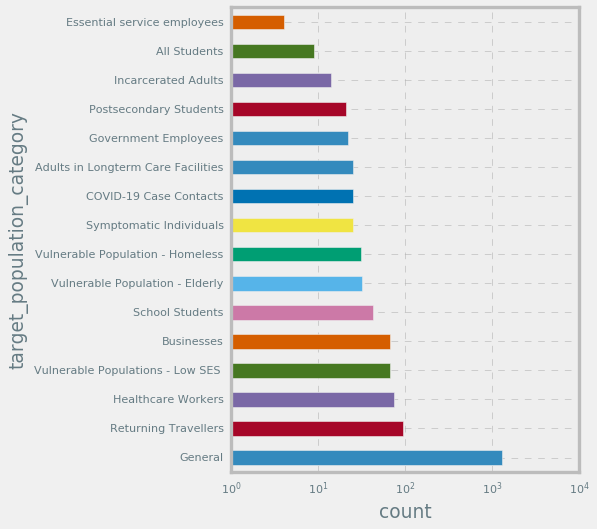

In [1029]:
full_df.groupby(by="target_population_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(5,7))
plt.xlabel('count')

## NPI: Intervention Categories

In [1048]:
len(full_df['intervention_category'].unique())

60

In [1049]:
intervention_counts = pd.DataFrame(full_df.groupby(by='intervention_category').count().max(axis=1))

In [1051]:
pd.set_option('display.max_colwidth', -1)

examples = pd.DataFrame(full_df.groupby(by='intervention_category').apply(lambda x: x.sample(1, random_state=1)['intervention_summary'].values[0]))

intervention_counts.merge(examples, left_index=True, right_index=True).sort_values(by='0_x', ascending=False)



,0_x,0_y
intervention_category,,
Public Announcement,181,Public announcement that the government is taking over central management of public sector supply chains
General case announcement,144,Two new presumptive cases- travel related
Emergency economic funding,112,"Immediate short-term relief to Nunavut businesses through its Small Business Support Program (a non-repayable $5,000 contribution per business)"
Social Distancing Announcement,79,CP Rail Pedestrian Bridge Closed due to inability to practice social distancing
Emergency social services funding,79,Phone-in helpline established for people undergoing self-isolation
Non-essential workplace closure,71,Minimization of all non-priority services and activities
Recreational / Entertainment Facility Closure,67,Provincial Guidance: Closure of all concert venues\n
Public event/ meeting cancellation or postponement,66,Summer recreation program registration cancelled
Healthcare facility restrictions,60,Suspension of non-essential visits to Sunnyside (LTC) Home


Text(0.5,0,'count')

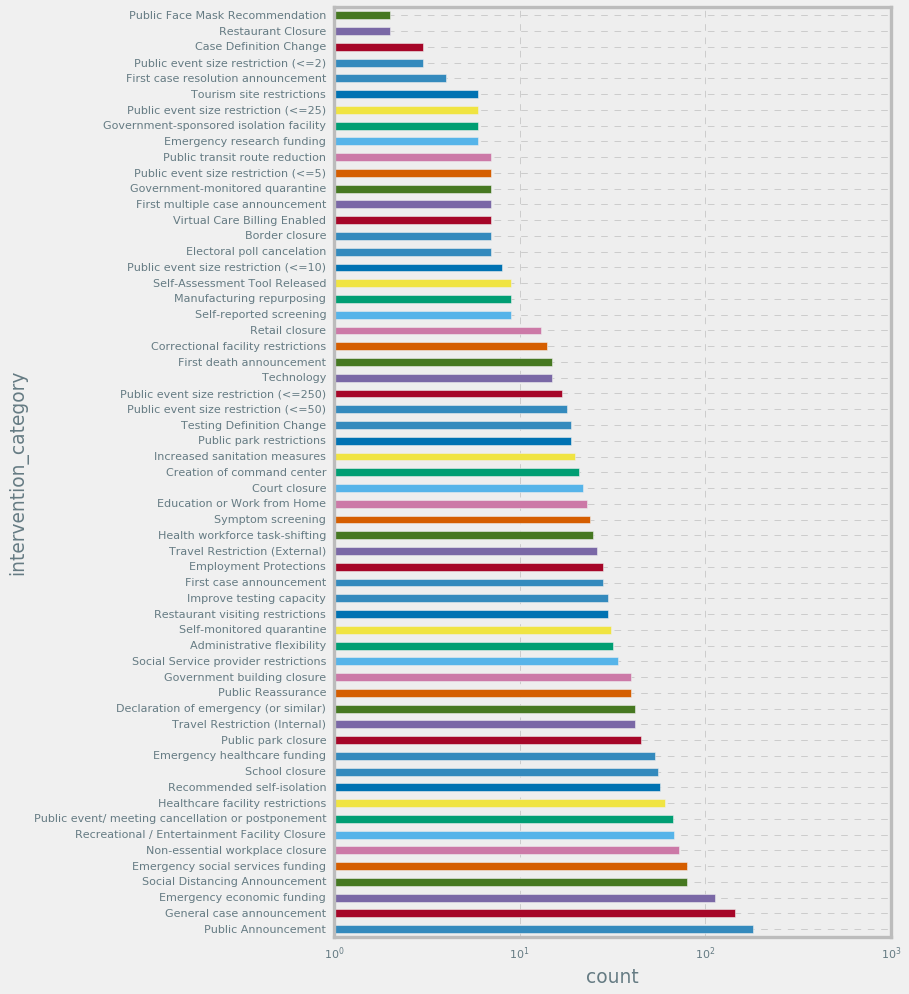

In [992]:

full_df.groupby(by="intervention_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(8,14))
plt.xlabel('count')


In [ ]:
full_df.groupby(by='region')['intervention_category']

## NPI: Fiscal Measures

Show investments by province or subregion

In [1055]:
plt.style.available

['bmh',
 'seaborn-darkgrid',
 'seaborn-white',
 'ggplot',
 'dark_background',
 'fast',
 'seaborn-talk',
 'seaborn-whitegrid',
 'fivethirtyeight',
 'seaborn-muted',
 'classic',
 'grayscale',
 '_classic_test',
 'seaborn-dark-palette',
 'seaborn-paper',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-poster',
 'seaborn-dark',
 'seaborn-ticks',
 'tableau-colorblind10',
 'seaborn-pastel',
 'seaborn-deep',
 'Solarize_Light2',
 'seaborn',
 'seaborn-colorblind']

In [1069]:
df = pd.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6],
    'signups': [5, 5, 6, 12, 14, 13],
    'visits': [20, 42, 28, 62, 81, 50],
}, index=pd.date_range(start='2018/01/01', end='2018/07/01',
                       freq='M'))
df

,sales,signups,visits
2018-01-31,3,5,20
2018-02-28,2,5,42
2018-03-31,3,6,28
2018-04-30,9,12,62
2018-05-31,10,14,81
2018-06-30,6,13,50


In [1093]:
#fig, ax = plt.subplots(figsize=(12,10))

dates = pd.date_range(start='03-01-2020', end='04-12-2020', name='dates').to_series() #mm-dd-yyyy
gb = provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()][['start_date', 'region', 'oxford_fiscal_measure_cad']].groupby(by='region')
provinces_fiscal = pd.DataFrame(dates)

for g_name, g_df in gb:
    all_dates_df = g_df.join(dates, on='start_date', how='right')
    all_dates_df['oxford_fiscal_measure_cad'] = all_dates_df['oxford_fiscal_measure_cad'].fillna(0)
    all_dates_df = all_dates_df.sort_values(by='start_date', ascending=True)
    all_dates_df['cumulative'] = all_dates_df['oxford_fiscal_measure_cad'].cumsum(axis=0)
    all_dates_df.set_index('start_date')
    all_dates_df = all_dates_df.groupby(by='start_date').sum()

    provinces_fiscal[g_name] = all_dates_df['cumulative']

#plt.yscale('log')
#plt.title('')
#plt.ylabel('Fiscal Interventions ($)')
#plt.xlabel('Date')

provinces_fiscal

,dates,Alberta,British Columbia,Manitoba,NWT,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
dates,,,,,,,,,,,,,,
2020-03-01,2020-03-01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
2020-03-02,2020-03-02,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
2020-03-03,2020-03-03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
2020-03-04,2020-03-04,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
2020-03-05,2020-03-05,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
2020-03-06,2020-03-06,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
2020-03-07,2020-03-07,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
2020-03-08,2020-03-08,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0
2020-03-09,2020-03-09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.0,0.0


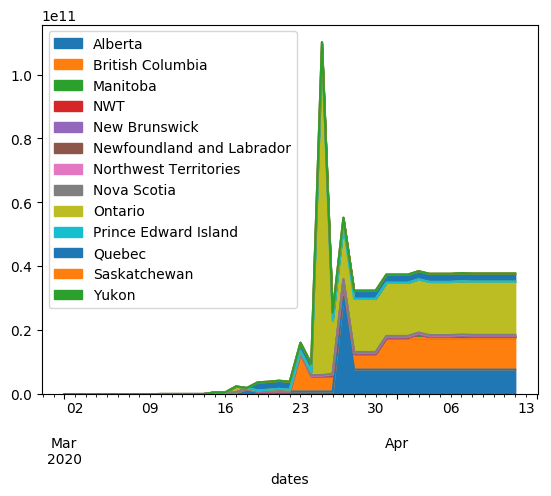

In [1098]:
provinces_fiscal.drop(['dates'], axis=1).plot.area()

In [1099]:
provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()]['oxford_fiscal_measure_cad']

22      6.150000e+05
24      1.320000e+07
44      8.259000e+06
48      5.000000e+06
61      2.600000e+06
622     5.000000e+08
629     6.000000e+07
632     5.000000e+07
634     1.930000e+08
647     2.045000e+09
648     1.100000e+09
649     1.130000e+08
650     6.300000e+06
651     3.600000e+09
688     5.000000e+06
703     2.000000e+06
707     1.000000e+07
714     3.500000e+06
721     5.000000e+06
724     5.000000e+09
749     5.000000e+07
764     1.500000e+09
765     5.000000e+08
771     1.700000e+09
773     1.100000e+09
947     4.000000e+06
979     2.000000e+05
994     2.800000e+07
1013    1.000000e+07
1038    2.000000e+05
            ...     
1255    2.500000e+07
1270    9.000000e+02
1282    7.500000e+02
1292    5.000000e+07
1293    2.000000e+07
1563    1.200000e+08
1564    5.000000e+05
1566    2.000000e+08
1665    2.500000e+06
1680    7.000000e+06
1690    2.500000e+09
1741    2.500000e+07
1744    2.500000e+05
1745    1.000000e+05
1746    1.000000e+05
1747    5.000000e+04
1755    4.500

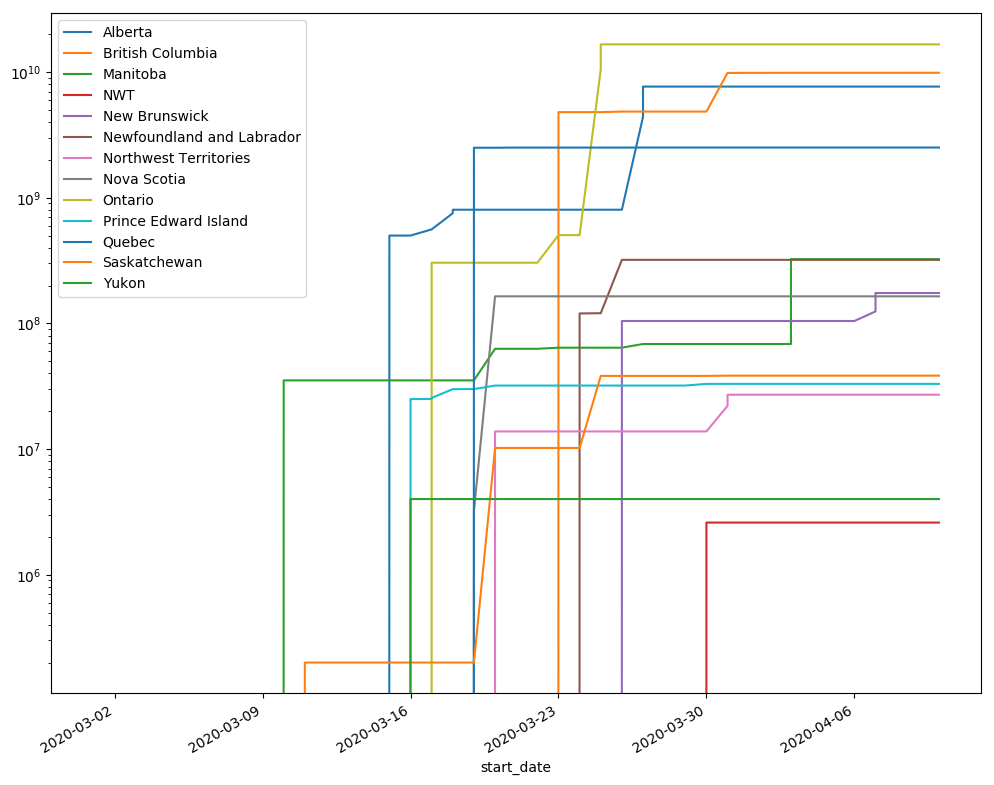

In [1102]:
fig, ax = plt.subplots(figsize=(12,10))

dates = pd.date_range(start='03-01-2020', end='04-10-2020', name='dates').to_series() #mm-dd-yyyy
gb = provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()][['start_date', 'region', 'oxford_fiscal_measure_cad']].groupby(by='region')

for g_name, g_df in gb:
    all_dates_df = g_df.join(dates, on='start_date', how='right')
    all_dates_df['oxford_fiscal_measure_cad'] = all_dates_df['oxford_fiscal_measure_cad'].fillna(0)
    all_dates_df = all_dates_df.sort_values(by='start_date', ascending=True)
    all_dates_df['oxford_fiscal_measure_cad_cumsum'] = all_dates_df['oxford_fiscal_measure_cad'].cumsum(axis=0)
    #print(all_dates_df)
    all_dates_df.plot(x='start_date', y='oxford_fiscal_measure_cad_cumsum', label=g_name, ax=ax)

plt.yscale('log')

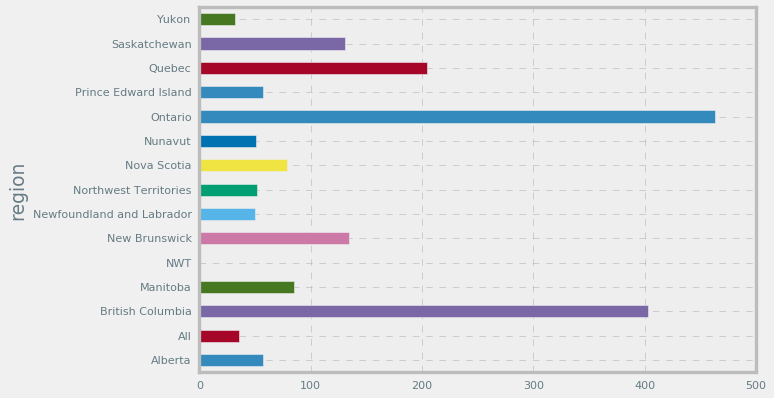

In [994]:
full_df.groupby(by=['region']).count().max(axis=1).plot.barh()

Text(0,0.5,'Intervention Count')

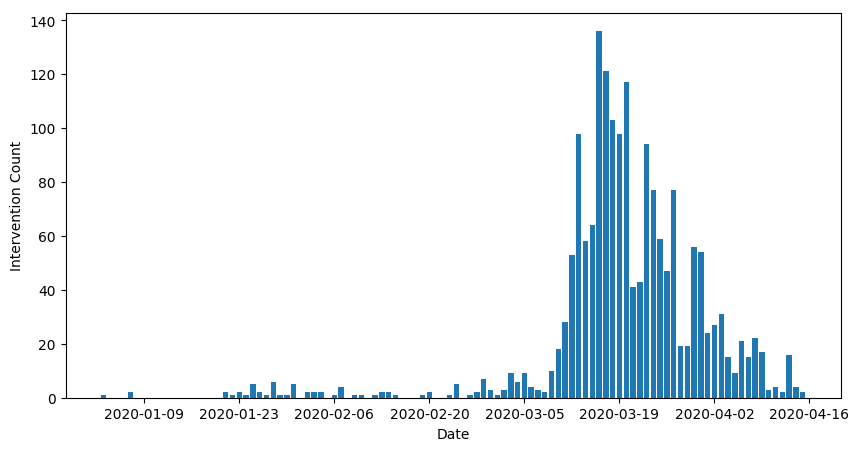

In [1169]:
fig, ax = plt.subplots(figsize=(10,5))

xticks = pd.date_range(start=full_df['start_date'].min(), end='03-31-2020', freq='M')
#subset = full_df[full_df['start_date'] < pd.to_datetime('04-01-2020')]
ts = full_df.groupby(by=['start_date'])['intervention_category'].count()

plt.bar(ts.index, ts.values)
plt.xlabel('Date')
plt.ylabel('Intervention Count')

In [1164]:
full_df[full_df['start_date'] > pd.to_datetime('04-16-2020')]

,start_date,end_date,reviewer,country,region,subregion,intervention_summary,intervention_category,target_population_category,enforcement_category,...,oxford_monetary_measure,oxford_testing_code,oxford_tracing_code,source_url,source_organization,source_organization_2,source_category,source_title,source_full_text,note
91,2020-06-03,NaT,Margot,Canada,All,NaN,"Emergency funding for COVID-19 research, round 1",Emergency research funding,General,Not Applicable,...,NaN,NaN,NaN,https://www.canada.ca/en/institutes-health-research/news/2020/03/government-of-canada-invests-27m-in-coronavirus-research.html,Government of Canada,Canadian Institutes of Health Research,Government Website,Government of Canada invests $27M in coronavirus research,"March 6, 2020 – Montreal, Quebec – Canadian Institutes of Health Research\n\nSince the outbreak of COVID-19, the Government of Canada has been working with provinces, territories, and international partners to protect the health and well-being of Canadians. As more countries begin to deal with COVID-19 outbreaks, the Government of Canada is investing in Canadian researchers to learn more about this novel coronavirus and to develop tools and resources to combat it. \n\nTo further contribute to global efforts to address the COVID-19 outbreak, today, the Honourable Patty Hajdu, Canada’s Minister of Health, and the Honourable Navdeep Bains, Canada’s Minister of Innovation, Science and Industry, announced an investment of nearly $27 million to fund coronavirus research. Due to the overwhelming response to the call for research applications, the Government of Canada increased its original investment from $7 million to $27 million. This investment will support 47 research teams from across Canada that will focus on accelerating the development, testing, and implementation of measures to deal with the COVID-19 outbreak. The Ministers made the announcement with the Honourable Mélanie Joly, Minister of Economic Development and Official Languages, and the Honourable Jean-Yves Duclos, President of the Treasury Board.\n\nThe research will help inform clinical and public health responses, develop and evaluate diagnostic tools and vaccines, as well as create strategies to tackle misinformation, stigma, and fear. The Government of Canada is providing the funding for this research through the Canadian Institutes of Health Research (CIHR), the Natural Sciences and Engineering Research Council of Canada (NSERC), the Social Sciences and Humanities Research Council (SSHRC), the Canada Research Coordinating Committee (CRCC) through the New Frontiers in Research Fund (NFRF), the International Development Research Centre (IDRC), and Genome Canada (GC).\n\nQuotes\n“Canada’s researchers are some of the best in the world, and this funding will allow them to conduct groundbreaking research on a novel coronavirus. Protecting the health and well-being of all Canadians is our top priority, and the research conducted thanks to this funding will contribute to mitigating the outbreak of COVID-19.”\n\nThe Honourable Patty Hajdu, Minister of Health\n“Our government knows that science is at the heart of innovation and a top priority to keep Canadians safe and healthy. Today’s investment will go a long way to help support life-saving research, as we collaborate with international partners to manage the coronavirus outbreak.”\n\nThe Honourable Navdeep Bains, Minister of Innovation, Science and Industry\n“This rapid-response collaboration mobilizes the best of what Canada can offer, paired with strong expertise from partner countries, to contribute towards real solutions to address COVID-19. The research funded through this initiative will have a global scope, in recognition of the needs of the less developed countries at high risk from this outbreak.”\n\nThe Honourable Karina Gould, Minister of International Development\n“Research is a vital component of the response to emerging disease outbreaks. The research to be undertaken by the succe

Text(0.5,0,'Number of unique intervention categories recorded')

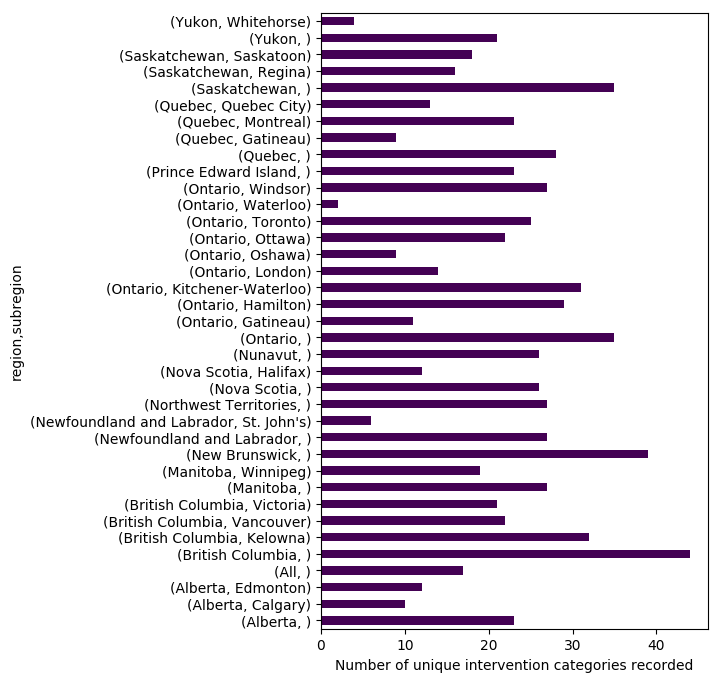

In [1163]:
full_df.fillna('').groupby(by=['region', 'subregion'])['intervention_category'].nunique().plot.barh(figsize=(5,8), cmap='viridis')
plt.xlabel('Number of unique intervention categories recorded')

Text(0.5,0,'Number of unique Oxford interventions recorded')

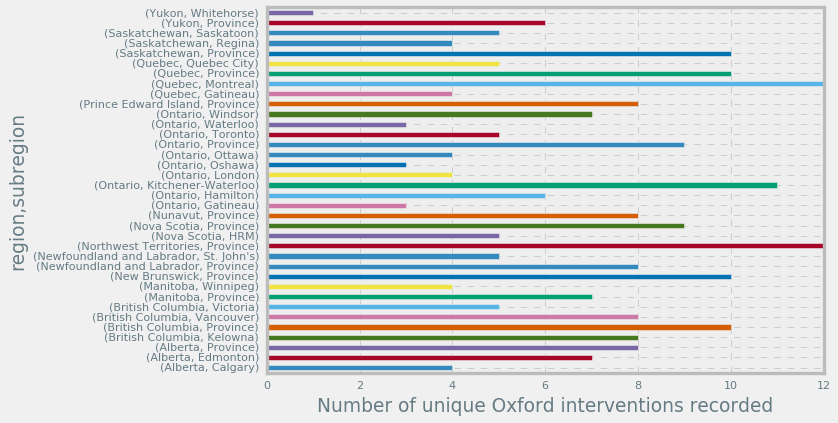

In [922]:
full_df.fillna('Province').groupby(by=['region', 'subregion'])['oxford_government_response_category'].nunique().plot.barh()
plt.xlabel('Number of unique Oxford interventions recorded')


Text(0,0.5,'Unique Intervention Categories Recorded')

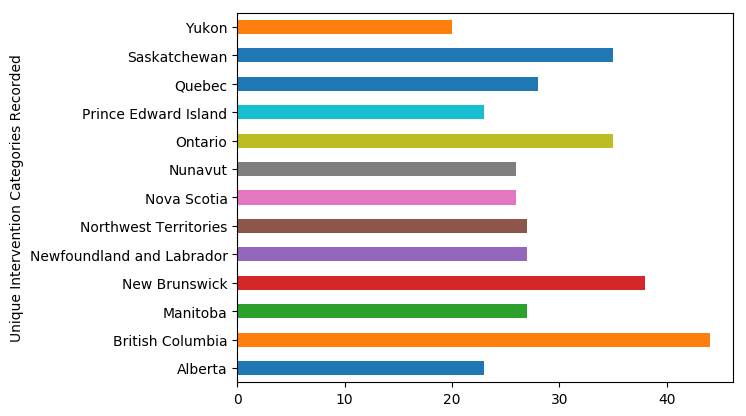

In [1111]:
provinces_df.groupby(by='region')['intervention_category'].nunique().plot.barh()
plt.ylabel('Unique Intervention Categories Recorded')

Text(0.5,0,'Number of unique interventions recorded')

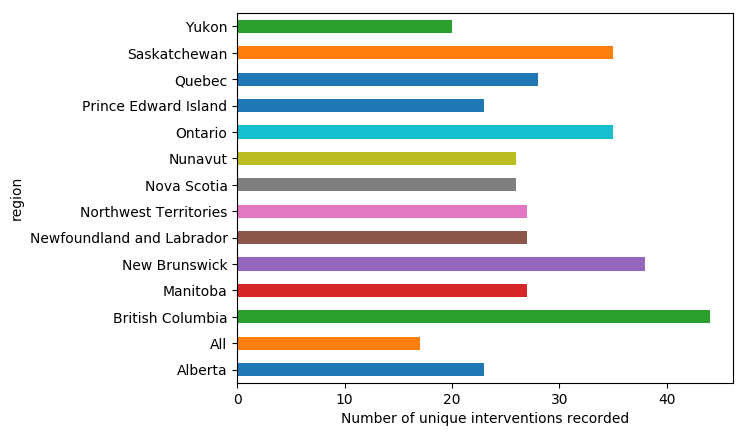

In [1114]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['intervention_category'].nunique().plot.barh()
plt.xlabel('Number of unique interventions recorded')


Text(0.5,0,'Number of unique interventions recorded')

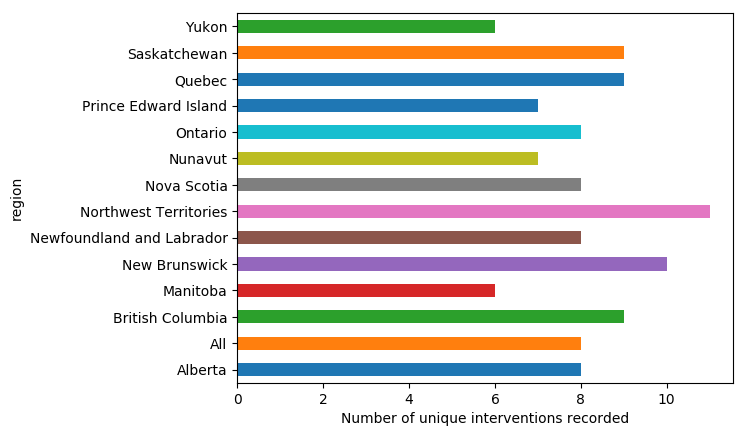

In [1112]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_government_response_category'].nunique().plot.barh()
plt.xlabel('Number of unique Oxford response measures recorded')


Text(0.5,0,'Oxford Fiscal Measure (CAD) recorded')

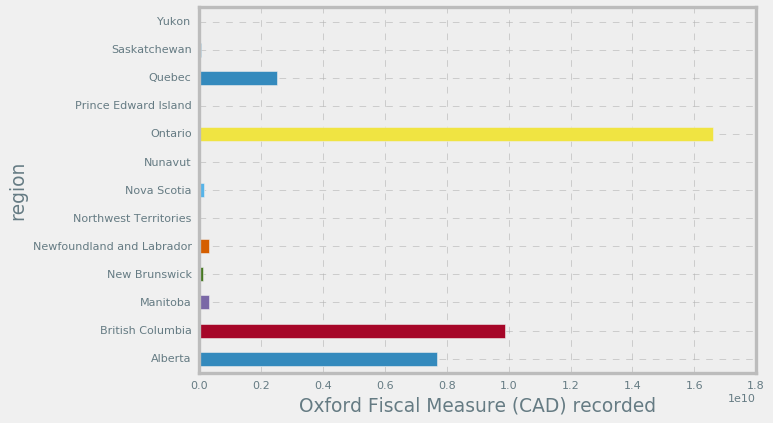

In [925]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_fiscal_measure_cad'].sum().plot.barh()
plt.xlabel('Oxford Fiscal Measure (CAD) recorded')


Text(0,0.5,'$ / person')

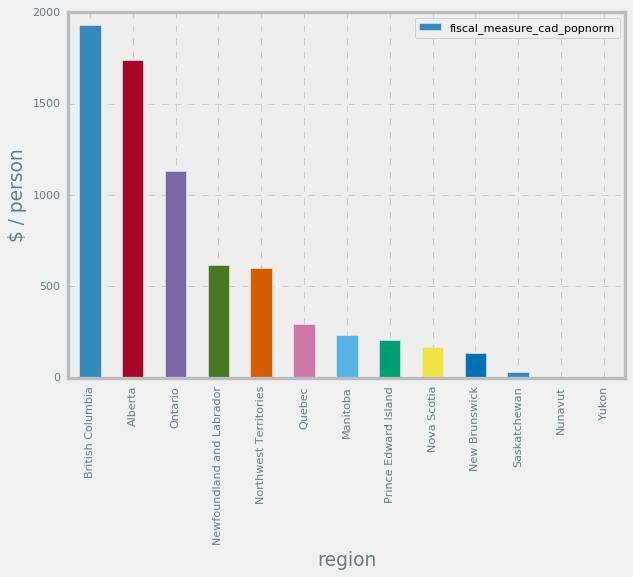

In [858]:
df = pd.DataFrame(provinces_df.groupby(by='region')['oxford_fiscal_measure_cad'].sum())
df['region'] = df.index
df = df.merge(population_df, on='region', how='left')
df['fiscal_measure_cad_popnorm'] = df['oxford_fiscal_measure_cad'] /  df['population_q1_2020']
df = df.sort_values(by='fiscal_measure_cad_popnorm', ascending=False)
df.plot.bar(x='region', y='fiscal_measure_cad_popnorm')
plt.ylabel("$ / person")

Text(0,0.5,'fiscal measures (CAD)')

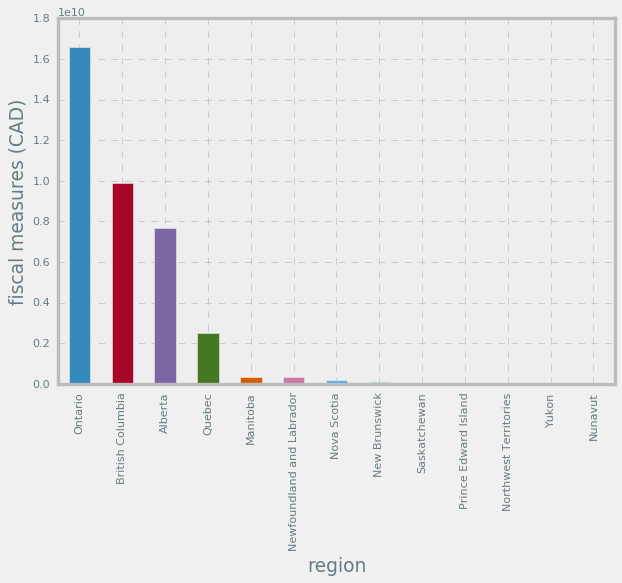

In [859]:
provinces_df.groupby(by='region')['oxford_fiscal_measure_cad'].sum().sort_values(ascending=False).plot.bar()
plt.ylabel('fiscal measures (CAD)')

## Clustering Representation

For now just showing clustering on hand-applied labels.

In [1115]:
>>> from sklearn import preprocessing
df = full_df.fillna(-1)

le_re = preprocessing.LabelEncoder()
le_re.fit(df['region'].astype(str).values)
le_ic = preprocessing.LabelEncoder()
le_ic.fit(df['intervention_category'].astype(str).values)
le_ec = preprocessing.LabelEncoder()
le_ec.fit(df['enforcement_category'].astype(str).values)
le_tp = preprocessing.LabelEncoder()
le_tp.fit(df['target_population_category'].astype(str).values)

LabelEncoder()

In [1116]:
y = le_ic.transform(df['intervention_category'].astype(str))
X = np.array([
    le_re.transform(df['region'].astype(str)),
    le_ec.transform(df['enforcement_category'].astype(str)),
    le_tp.transform(df['target_population_category'].astype(str)),
    df['oxford_closure_code'].astype(int),
    df['oxford_public_info_code'].astype(int),
    df['oxford_travel_code'].astype(int),
    df['oxford_geographic_target_code'].astype(int)]).T

In [1117]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X, y)
X_embedded

array([[  2.433639 ,   6.2499757],
       [  2.4334912,   6.2500463],
       [  1.2500088,  35.445637 ],
       ...,
       [-11.613566 ,  31.020178 ],
       [ -8.352603 ,   5.9379573],
       [-11.7242775,  31.165323 ]], dtype=float32)

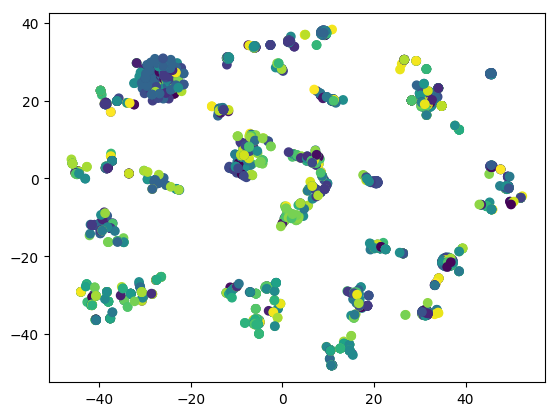

In [1118]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y)

# LDA on Intervention Text

Topics on full text just find regions. Need to remove all location-based markers from full text.

In [760]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import text 

We choose to leave out geography-related words by marking them as stop words. This seems to prevent the model from picking up on the strong geographical topics in our selection of data and helps it discover other useful clusters.

In [860]:
r = [x.split() for x in full_df['region'].dropna().unique().tolist()]
r = np.hstack([np.array(x) for x in r])
sr = [x.split() for x in full_df['subregion'].dropna().unique().tolist()]
sr = np.hstack([np.array(x) for x in sr])
geo_stop_words = np.append(r, sr)
geo_stop_words = [x.lower() for x in geo_stop_words]
geo_stop_words = [x.replace('(','').replace(')','') for x in geo_stop_words]
stop_words = text.ENGLISH_STOP_WORDS.union(geo_stop_words)

We automate the selection of the number of topics by calculating the perplexity score for the model and minimizing across the number of topics.

In [926]:
def topic_selection(tf, tmax, tstep, debug=False):
    topic_sizes = np.arange(1, tmax, tstep)
    topic_ll = []
    topic_perplexity = []
    models = []
    for k in topic_sizes:


        n_topics = k

        lda = LatentDirichletAllocation(n_components=n_topics, 
            max_iter=10, 
            learning_method='online',
            learning_offset=50.,
            random_state=3).fit(tf)

        # use perplexity for now.. try gensim coherence later
        # see https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/topic_coherence_model_selection.ipynb
        topic_ll.append( lda.score(tf) )
        p = lda.perplexity(tf)
        topic_perplexity.append( p )
        models.append(lda)
        
        if (debug):
            print('Topics: ', k, ' perplexity ', p)
    
    idx = np.where(topic_perplexity == np.amin(topic_perplexity))[0][0]
    selected_lda = models[idx]
    ntopics = topic_sizes[idx]
    return topic_sizes, topic_perplexity, selected_lda, ntopics

In [961]:
def show_topk_words(lda, k, tf_feature_names):
    n_top_words = k
    for topic_i, topic in enumerate(lda.components_):
        print( "Topic ", topic_i )
        print( "Words: ", [print(tf_feature_names[i]) for i in topic.argsort()[:-n_top_words - 1:-1]] )
        

### Full Source Text

Here we apply LDA to the full text of each source (except french sources)

In [869]:
len(full_df['source_url'].unique()) / full_df.shape[0]

0.5554279149913842

In [999]:
# Remove french
engl_df = full_df[full_df['region'] != 'Quebec']
full_text = engl_df['source_full_text'].drop_duplicates().astype(str)
data = full_text.values
data = [re.sub('\s+', ' ', text) for text in data] # remove new lines
data = [re.sub("\'", "", text) for text in data] # remove quotes
len(data)

915

In [820]:
n_words = 1000
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_words, stop_words=stop_words)
tf = tf_vectorizer.fit_transform( data )
tf_feature_names = tf_vectorizer.get_feature_names()

In [927]:
topic_sizes, topic_perplexity, lda, ntopics = topic_selection(tf, 40, 2)
print("Selected ", ntopics, " topics")

Selected  13  topics


Text(0,0.5,'perplexity')

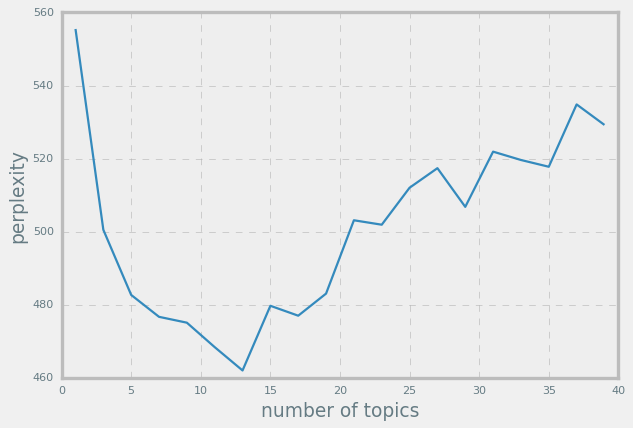

In [862]:
plt.plot(topic_sizes, topic_perplexity)
plt.xlabel('number of topics')
plt.ylabel('perplexity')

In [962]:
show_topk_words(lda, 15, tf_feature_names)

Topic  0
service
bus
customers
march
transit
halifax
games
hsr
buses
use
route
passengers
social
distancing
closed
Words:  [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Topic  1
867
gov
pdf
nu
gn
chief
department
office
gatherings
emergency
grocery
975
stores
events
store
Words:  [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Topic  2
order
health
public
officer
act
march
2020
section
person
police
request
measures
orders
medical
effect
Words:  [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Topic  3
students
school
education
learning
schools
parents
year
12
communities
minister
leaders
break
institutions
march
nwt
Words:  [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Topic  4
com
residents
ca
twitter
facebook
instagram
media
cityofto
information
people
416
public
338
economic
health
Words:  [None, None, None, N

# LDA on Intervention Summary Text

In [591]:
full_summaries = full_df['intervention_summary'].drop_duplicates().astype(str)

In [722]:

n_words = 200

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_words, stop_words='english')
tf = tf_vectorizer.fit_transform( full_summaries )
tf_feature_names = tf_vectorizer.get_feature_names()

Topics:  1
161.6655431885962
Topics:  3
158.8819707894937
Topics:  5
160.2027677133803
Topics:  7
150.99204789508047
Topics:  9
162.65943988464053
Topics:  11
160.22828200412295
Topics:  13
154.98036726891738
Topics:  15
152.8002833678197
Topics:  17
167.88116260735652
Topics:  19
164.78970754154554
Topics:  21
163.74855208606476
Topics:  23
183.4391305930914
Topics:  25
179.03508701177822
Topics:  27
174.4884012679839
Topics:  29
186.72993943882813
Topics:  31
184.26920024260096
Topics:  33
189.77777779035577
Topics:  35
202.4859365939989
Topics:  37
200.80264286558486
Topics:  39
214.22437366162393


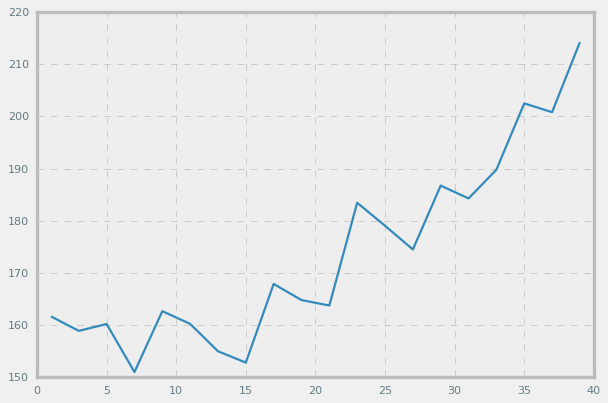

In [723]:
topic_sizes, topic_perplexity, lda, ntopics = topic_selection(tf, 40, 2)
print("Selected ", ntopics, " topics")

In [ ]:
plt.plot(topic_sizes, topic_perplexity)
plt.xlabel('number of topics')
plt.ylabel('perplexity')

In [724]:
show_topk_words(lda, 20, tf_feature_names)

Topic  0
Words:  ['covid', '19', 'health', 'home', 'centre', 'work', 'community', 'employees', 'working', 'assessment', 'patients', 'positive', 'people', 'response', 'information', 'help', 'symptoms', 'testing', 'provide', 'online']
Topic  1
Words:  ['care', 'closure', 'facilities', 'term', 'long', 'centres', 'visitors', 'screening', 'parks', 'parking', 'homes', 'municipal', 'closed', 'park', 'child', 'support', 'hospital', 'close', 'programs', 'hospitals']
Topic  2
Words:  ['emergency', 'provincial', 'people', 'social', 'service', 'distancing', 'gatherings', 'closure', 'guidance', 'state', 'public', '50', 'restaurants', 'businesses', 'measures', 'services', 'delivery', 'declared', 'bars', 'operations']
Topic  3
Words:  ['public', 'health', 'cancelled', 'services', 'contact', 'events', 'transit', 'cancellation', 'use', 'food', 'april', 'capacity', 'investment', 'day', 'stores', 'medical', 'retail', 'cleaning', 'homeless', 'funding']
Topic  4
Words:  ['self', '14', 'days', 'isolate', 't

## Retrieving relevant research related to interventions

Guiding searches related to interventions is particularly important because research comes in many forms and across many jurisdictions. We compare using the human-crafted labels as search terms with LDA-generated word clusters from selected Canadian intervention articles and examine the results by inspection to determine relevancy of the results.



In [964]:
# Making use of Covidex as demonstrated here:
# https://colab.research.google.com/drive/1mrapJp6-RIB-3u6FaJVa4WEwFdEBOcTe

!pip install pyserini==0.8.1.0
import json
import os


    100% |################################| 57.7MB 203kB/s ta 0:00:011    51% |################                | 29.6MB 10.0MB/s eta 0:00:03
    100% |################################| 1.1MB 4.8MB/s ta 0:00:011
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [965]:
!wget https://www.dropbox.com/s/d6v9fensyi7q3gb/lucene-index-covid-2020-04-03.tar.gz
!tar xvfz lucene-index-covid-2020-04-03.tar.gz

--2020-04-15 05:27:09--  https://www.dropbox.com/s/d6v9fensyi7q3gb/lucene-index-covid-2020-04-03.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.11.1, 2620:100:6050:1::a27d:b01
Connecting to www.dropbox.com (www.dropbox.com)|162.125.11.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d6v9fensyi7q3gb/lucene-index-covid-2020-04-03.tar.gz [following]
--2020-04-15 05:27:10--  https://www.dropbox.com/s/raw/d6v9fensyi7q3gb/lucene-index-covid-2020-04-03.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc31bfe009db4c0793b021687bc5.dl.dropboxusercontent.com/cd/0/inline/A1169WWXgTnwZotSRZTqyi9jVwZ93xj6y2Y_GlP2mBBICXEbVBKWwpfi5JBS8_dcbwHTFEJ0dVM4aX070lJUk7CbUmHfxReOlNBL60otHAil7VzSxj4z7NOJ0wwhSJq4f-w/file# [following]
--2020-04-15 05:27:10--  https://uc31bfe009db4c0793b021687bc5.dl.dropboxusercontent.com/cd/0/inline/A1169WWXgTnwZotSRZTqyi9jVwZ93xj6y2Y_GlP2

In [966]:
!du -h lucene-index-covid-2020-04-03

1.5G	lucene-index-covid-2020-04-03


In [972]:
from pyserini.search import pysearch

searcher = pysearch.SimpleSearcher('lucene-index-covid-2020-04-03/')
hits = searcher.search('incubation period of COVID-19')

CalledProcessError: Command '['which', 'javac']' returned non-zero exit status 1.

In [967]:
for intervention_cat in full_df['intervention_category'].unique():
    print(intervention_cat)

Testing Definition Change
Recommended self-isolation
Public Announcement
Recreational / Entertainment Facility Closure
Public Reassurance
Travel Restriction (External)
Creation of command center
Symptom screening
School closure
Employment Protections
Public event size restriction (<=50)
Social Distancing Announcement
Declaration of emergency (or similar)
Emergency healthcare funding
Non-essential workplace closure
Emergency economic funding
Travel Restriction (Internal)
Self-monitored quarantine
First case announcement
Improve testing capacity
Public event size restriction (<=2)
Border closure
Healthcare facility restrictions
Self-Assessment Tool Released
Manufacturing repurposing
Emergency social services funding
Increased sanitation measures
Public park closure
Social Service provider restrictions
Public event/ meeting cancellation or postponement
Public park restrictions
nan
General case announcement
First multiple case announcement
Restaurant visiting restrictions
Tourism site rest

In [ ]:
from pyserini.search import pysearch